# La Cinematica 1D - Definizioni preliminari
In questo notebook si illustrano i concetti relativi alla *cinematica puntiforme*, in particolare vedremo i concetti della *velocità media* e *velocità istantanea*.
Adesso diamo delle definizioni.

> Definizione 1. Velocità
> 
> Supponiamo che in un intervallo di tempo $\Delta t$ un corpo ha uno spostamento $\Delta x$.
> Si dice la *"velocità media sull'intervallo $\Delta t$"* come il *rapporto incrementale*
> $$v_m = \frac{\Delta x}{\Delta t} $$
> In particolare quando si passa al limite
> $$\lim_{\Delta t \to 0} \frac{\Delta x}{\Delta t} = \frac{\text{d}x}{\text{d}t}$$ 
> si ha la *velocità istantanea sul corpo nel punto $t$*.

Questa definizione può valere quando abbiamo uno *spostamento* rappresentato come un *vettore tridimensionale*, ovvero come un vettore del tipo
$$\Delta \vec{r} = \Delta x \cdot \hat{i} + \Delta y \cdot \hat{j} + \Delta z \cdot \hat{k}$$



# Esempio Numerico
**OBBIETTIVO.** Adesso vogliamo trovare un *esempio numerico* per questo concetto. 
Qualche giorno fa, in particolare il 9 marzo dell'anno 2024, ho deciso di camminare verso la piazza Unità d'Italia per incontrare dei miei amici. Per far un buon uso di questo spostamento, ho deciso di registrare tutti i dati di questo percorso tramite il tracciamento GPS del mio cellulare.
Quindi, con questi dati pronti possiamo svolgere una specie di *"esperimento numerico"* per trovare la velocità con cui ho camminato verso la piazza durante il tragitto. In particolare voglio trovare tutte le componenti vettoriali della velocità $\vec{v}$.

**DATI.** Ho raccolto i dati di questa camminata con l'applicazione *"GPS Logger"* reperibile su *Play Store*, poi esportata in formato file csv. Leggendo l'intestazione del file *csv* ho:
`type,date time,latitude,longitude,accuracy(m),altitude(m),geoid_height(m),speed(m/s),bearing(deg),sat_used,sat_inview,name,desc`
Ovvero ho una molteplicità di dati disponibili: ho la data in cui è stata registrata la posizione, la latitudine, la longitudine e l'altezza, la velocità e altri dettagli tecnici...
Per non sconfiggere lo scopo di questo calcolo *ignoreremo* il dato `speed(m/s)` e ci concentreremo solo sui dati `latitude,longitude,altitude(m)` (ignoriamo il dato `date time` dato che l'applicazione ha automaticamente registrato tutti i dati con uno scarto temporale uguale a $\Delta t = 1 \text{ s}$.

**SVOLGIMENTO.** Per svolgere questo calcolo, prima definisco tutte le classi necessarie per leggere un file CSV numerico, soffermandoci sui dati appena elencati. In particolare voglio estrapolare *solo* i dati numerici interessati in forma di lista linkata del tipo
```py
[
    [100, 200, 30],
    [10, 20, 300],
    ...
    [100,100,30]
]
```
Dopodiché usiamo questo *tipo dato* per convertire la *latitudine* e la *longitudine* in *coordinate cartesiane*, espresse in *metri*. Per convertire la *latitudine*, è sufficiente considerare la definizione di radiante come
$$ \theta = \frac{S}{R}$$
dove $S$ è l'altezza (ovvero il dato voluto), $R$ il *raggio della circonferenza*. Allora ho quindi
$$y = S = R \cdot \theta \cdot \frac{\pi}{180}$$
(la costante dell'ultimo membro è per convertire i gradi in radianti)
Per quanto invece la *longitudine* il discorso è più complesso dato che ci troviamo su una sfera (circa), ma si può usare la formula
$$x = R \cdot \cos \left(\theta\cdot\frac{\pi}{180}\right)$$
Infine creo una nuova classe che immagazzina le *velocità medie per due scarti temporali immediati* componente per componente, in una lista nestata del tipo
```py
[
    [v_x, v_y, v_z],
    ...
    [1,2,3]
]
```

In [30]:
from math import cos

class GeoCSVFile: # Specifically purposed for .csv files generated by "GPS Tracker" app
    def __init__(self, filename):
        self.name = filename
        self.R = 6371000 # Radius of earth in metres 
        self.pi = 3.14 # Approximates pi to 3.14
        try:
            with open(self.name, "r") as f:
                f.readline()
        except:
            raise Exception("File not readable")
            self.readable = False
        else:
            self.readable = True
        self.data = None
    
    def get_data(self): # Extracts specific data (latitude, longitude, altitude(m)) and converts it into proper measures
        if not self.readable:
            raise Exception("File not readable")
            return None
        
        data = []
        
        with open(self.name, "r") as f:
            f.readline()
            for line in f:
                to_append = [[],[],[]]
                extracted = line.strip().split(",")
                index = [2, 3, 5]
                for i in index: # See whether the data is convertible or less
                    try:
                        float(extracted[i])
                    except:
                        raise Exception("Data is not convertible")
                to_append[0] = self.R * float(extracted[2]) * (self.pi/180)
                to_append[1] = self.R * cos(float(extracted[3])*(self.pi/180))
                to_append[2] = float(extracted[5])
                
                data.append(to_append)
                                
        self.data = data
        return self.data
    
    def calculate_velocity(self): # Returns linked list with mean velocities for each second (step by step)
        if self.data == None:
            raise Exception("Data not extracted!")
            return None
        
        increments = []
        prev_pos = None
        for pos in self.data:
            if prev_pos == None:
                prev_pos = pos
                continue
                
            increment = [pos[0]-prev_pos[0], pos[1]-prev_pos[1], pos[2]-prev_pos[2]] * 1 # Time increment is always dt=1
            prev_pos = pos
            increments.append(increment)
        return increments
        


<IPython.core.display.Javascript object>


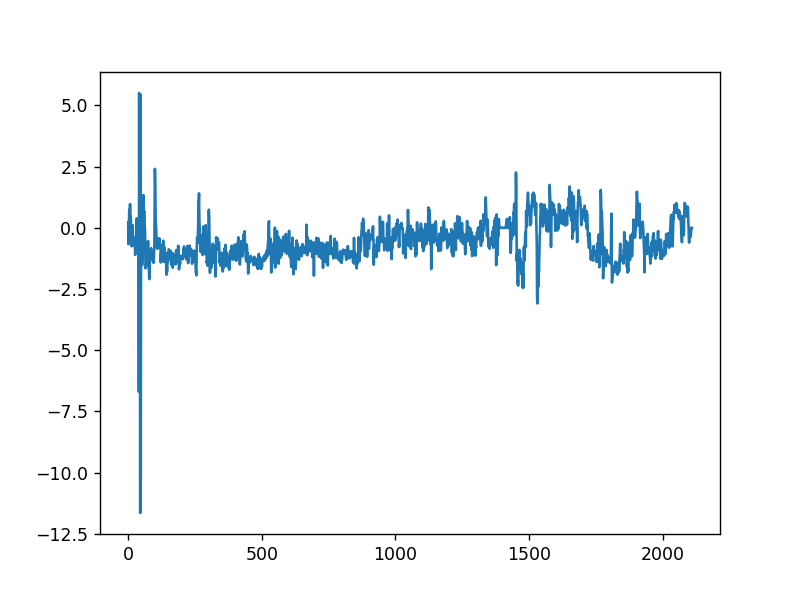

In [67]:
# Testing with the real file
v_x = []
v_y = []
v_z = []

File = GeoCSVFile("camminata_piazza.csv")
pos = File.get_data()
    
for data in File.calculate_velocity():
    v_x.append(round(data[0], 3))
    v_y.append(round(data[1], 3))
    v_z.append(round(data[2], 3))

# Plotting with matplotlib
import matplotlib.pyplot as plt
%matplotlib notebook 
T = [i for i in range(len(v_x))]

plt.plot(T, v_x)

plt.show()

# Conclusione
**CONCLUSIONE.** Con i dati appena visti possiamo concludere che la velocità media assume un massimo (in termini del valore assoluto) di circa $4.31 \ \frac{\text{m}}{\text{s}}$. Inoltra nel tempo $t \approx 45 \text{ s}$ dall'inizio della registrazione è stata verificata un'anomalia nella registrazione, dal momento che il calcolo della velocità sembra di dare risultati assurdi (tra cui quello di avere uno spostamento $-10 \ \frac{\text{m}}{\text{s}}$, che sarebbe circa di $36 \ \frac{\text{km}}{\text{h}}!). Per il resto, sembra essere registrata una velocità abbastanza ragionevole per una camminata (considerando lo spostamento in tutte le direzioni).